<a href="https://colab.research.google.com/github/igorfnogueira/analise_aluguel_imoveis/blob/main/Igor_Fonseca_atividade_analise_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Imobiliários em São Paulo com Python, SQL ou PySpark

Você faz parte de uma equipe de analistas de dados contratada por uma startup do setor imobiliário. A empresa está interessada em entender o mercado de aluguel residencial em São Paulo para apoiar decisões estratégicas, como onde investir, que tipos de imóveis priorizar em campanhas de marketing e como precificar melhor os aluguéis.

Para isso, foi disponibilizado um conjunto de dados coletado da plataforma QuintoAndar, via técnicas de web scraping, no dia 1º de maio de 2023. O dataset contém informações relevantes como:

* address: endereço do imóvel

* district: distrito (bairro)

* area: área útil em m²

* bedrooms: número de quartos

* garage: número de vagas de garagem

* type: tipo do imóvel (ex: apartamento, kitnet, casa em condomínio)

* rent: valor do aluguel mensal

* total: custo total mensal (provavelmente inclui condomínio, IPTU, etc.)

##Desafios Propostos

* Qual é o valor médio do aluguel em São Paulo?

* Qual distrito tem o maior número de imóveis listados?

* Qual é a média de área (m²) dos imóveis por tipo de imóvel?

* Quantos imóveis têm mais de 2 quartos e pelo menos 1 vaga de garagem?

* Qual é o aluguel médio nos cinco distritos mais caros (com base no custo total médio)?

* Existe diferença significativa de preço entre imóveis com e sem garagem?

* Qual o tipo de imóvel mais comum em cada distrito?

* Quais imóveis têm área inferior a 30 m² e aluguel acima de R$3000?

* Qual a média do custo total por número de quartos?

##Desafio Final

Você acabou de realizar uma série de análises sobre imóveis para aluguel em São Paulo. Agora chegou a hora de interpretar os dados com mais profundidade e gerar conhecimento prático que possa ajudar investidores, locatários ou até mesmo plataformas imobiliárias a tomarem decisões melhores.

Com base nas análises realizadas até agora, traga insights relevantes que você considera interessantes ou úteis para entender o mercado de aluguel em São Paulo.

##Dataset

* O dataset está disponível no kaggle: [Clique Aqui](https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices)
* Caso prefiram, também subi ele para o meu drive: [Clique Aqui](https://drive.google.com/file/d/1Tz4fEHHKRSoXRVK7LdBwszAqevB73ngJ/view?usp=sharing)
* Se optarem por fazer com SQL ou PySpark, segue o script para a criação do banco e o tutorial para povoa-lo: [Clique Aqui](https://docs.google.com/document/d/1PyjpKeAUIsuuiLlmfW-GITIQ7v9dOGQzmVyNUESE8iU/edit?usp=sharing)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('/content/data.csv')

df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


####Qual é o valor médio do aluguel em São Paulo?

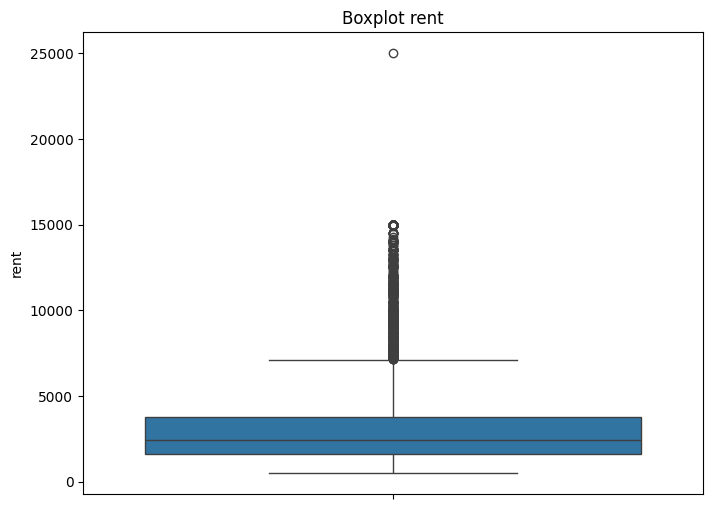

In [ ]:
#BOXPLOT PARA VERIFICAR SE HÁ OUTLIERS
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['rent'])
plt.title('Boxplot rent')
plt.show()

In [ ]:

# 1. Calcular Q1 e Q3
Q1 = df['rent'].quantile(0.25)
Q3 = df['rent'].quantile(0.75)

# 2. Calcular IQR
IQR = Q3 - Q1

# 3. Calcular o limite superior (para outliers altos)
limite_superior = Q3 + 1.5 * IQR

print(f"O valor de aluguel que inicia a ser outlier (acima) é: R$ {limite_superior:.2f}")

O valor de aluguel que inicia a ser outlier (acima) é: R$ 7115.00


In [ ]:
aluguel_alto = df[df['rent'] > 7115]
locais = aluguel_alto['district'].value_counts()
locais



,count
district,
Jardim Paulista,73
Cerqueira César,54
Santo Amaro,31
Vila Suzana,28
Campo Belo,26
...,...
Vila Cruzeiro,1
Jardim Vitoria Regia (zona Oeste),1
Parque do Morumbi,1


In [ ]:
'''Fiz uma analise por local, exibi toda a lista com casas de valores considerados outliers,
e a maioria dos locais que possuem mais de 10 alugueis nessa lista, são locais considerados área nobre
então realmente os outliers estão mostrando áreas mais caras, apesar de ter alguns locais que não são area nobre, mas
possuem poucos alugueis com valor considerado outlierr.
'''
pd.reset_option('display.max_rows')

In [ ]:
# para analisar melhor os dados irei utilizar a mediana do valor dos alugueis, para não levar em conta alugueis caros de áres nobres.
mediana_aluguel_sp = df['rent'].median()
print(f'A mediana do aluguel em São Paulo é de R${mediana_aluguel_sp:.2f}')


A mediana do aluguel em São Paulo é de R$2415.00


####Qual distrito tem o maior número de imóveis listados?

In [ ]:
mais_imoveis = df.groupby('district').size().sort_values(ascending=False)
mais_imoveis

,0
district,
Bela Vista,352
Vila Mariana,232
Jardim Paulista,220
Centro,178
Pinheiros,159
...,...
Vila Caraguata,1
Vila Capitao Rabelo,1
Vila Caminho do Mar,1


####Qual é a média de área (m²) dos imóveis por tipo de imóvel?

In [ ]:
df['type'].unique()


array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [ ]:
media_area_casa = df[df['type'] == 'Casa']['area'].mean()
media_area_casa_condominio = df[df['type'] == 'Casa em condomínio']['area'].mean()
media_area_apartamento = df[df['type'] == 'Apartamento']['area'].mean()
media_area_studio = df[df['type'] == 'Studio e kitnet']['area'].mean()
print(f'Média da área de casas: {media_area_casa:.2f} M²')
print(f'Média da área de casas em condomínio: {media_area_casa_condominio:.2f} M²')
print(f'Média da área de apartamentos: {media_area_apartamento:.2f} M²')
print(f'Média da área de studios e kitnets: {media_area_studio:.2f} M²')

Média da área de casas: 136.14 M²
Média da área de casas em condomínio: 119.41 M²
Média da área de apartamentos: 73.32 M²
Média da área de studios e kitnets: 31.74 M²


####Quantos imóveis têm mais de 2 quartos e pelo menos 1 vaga de garagem?

In [ ]:
imoveis = df[(df['bedrooms'] > 2) & (df['garage'] >= 1)].shape[0]
print(f'Existem {imoveis} imóveis com mais de 2 quartos e pelo menos 1 vaga de garagem.')

Existem 2909 imóveis com mais de 2 quartos e pelo menos 1 vaga de garagem.


####Qual é o aluguel médio nos cinco distritos mais caros (com base no custo total médio)?

In [ ]:
aluguel_medio = df.groupby('district')['rent'].mean().sort_values(ascending=False)
aluguel_medio.head()

,rent
district,
Alphaville Residencial Dois,15000.0
Jardim Tango,15000.0
Alphaville Residencial Plus,15000.0
Residencial Cinco (alphaville),13600.0
Alphaville Residencial Um,13500.0


In [ ]:
nome_distritos = aluguel_medio.head().index.tolist()
nome_distritos

['Alphaville Residencial Dois',
 'Jardim Tango',
 'Alphaville Residencial Plus',
 'Residencial Cinco (alphaville)',
 'Alphaville Residencial Um']

In [ ]:
df_distritos_caros = df[df['district'].isin(nome_distritos)]
media=df_distritos_caros['rent'].mean()
print(f'O aluguel médio nos 5 distritos mais caros é de R${media:.2f}')

O aluguel médio nos 5 distritos mais caros é de R$14266.67


####Existe diferença significativa de preço entre imóveis com e sem garagem?

In [ ]:
df.groupby('garage')['rent'].median()

,rent
garage,
0,1524.5
1,2446.0
2,3935.0
3,6000.0
4,7500.0
5,8320.0
6,8430.0


Sim, a mediana dos preços sobe bastante de acordo com a quantidade de vagas em garagem, e os locais sem garagem são os mais baratos.

####Qual o tipo de imóvel mais comum em cada distrito?

In [ ]:
df_tipos_comuns = df.groupby('district')['type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

df_tipos_comuns = df_tipos_comuns.reset_index()
df_tipos_comuns


,district,type
0,Aclimação,Apartamento
1,Adalgisa,Apartamento
2,Agua Branca,Apartamento
3,Alphaville,Casa em condomínio
4,Alphaville Centro Industrial E Empresarial/alp...,Apartamento
...,...,...
1194,Várzea da Barra Funda,Apartamento
1195,Água Branca,Apartamento
1196,Água Fria,Casa
1197,Água Funda,Apartamento


####Quais imóveis têm área inferior a 30 m² e aluguel acima de R$3000?

In [ ]:
criterios = df[(df['area'] < 30) & (df['rent'] > 3000)]
criterios

,address,district,area,bedrooms,garage,type,rent,total
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
171,Rua Oscar Freire,Pinheiros,19,1,0,Studio e kitnet,3400,3905
266,Rua Caio Prado,Consolação,24,1,0,Studio e kitnet,4300,4765
305,Rua Correia Dias,Paraíso,23,1,0,Studio e kitnet,4000,4061
...,...,...,...,...,...,...,...,...
9887,Avenida Santo Amaro,Vila Nova Conceição,26,1,0,Apartamento,4850,5604
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
10355,Rua Girassol,Vila Madalena,26,1,0,Apartamento,5500,6080
11306,Rua Doutor Melo Alves,Cerqueira César,28,1,1,Studio e kitnet,3800,4602


####Qual a média do custo total por número de quartos?

In [ ]:
custo_total = df.groupby('bedrooms')['total'].mean().round(2)
custo_total

,total
bedrooms,
0,2622.59
1,2701.83
2,3443.65
3,6034.64
4,9968.30
5,9999.85
6,9602.13


##Mais alguns agrupamentos para ajudar na análise final

In [ ]:
df.groupby(['garage','bedrooms'])['rent'].median()

garage  bedrooms
0       0            1300.0
        1            1397.0
        2            1770.0
        3            2400.0
        4            4782.5
        5            6256.5
        6            5625.0
1       0            2515.0
        1            2600.0
        2            2200.0
        3            2900.0
        4            4200.0
        5            8250.0
        6            6000.0
2       1            3960.0
        2            3380.0
        3            3950.0
        4            5500.0
        5            5600.0
        6            8200.0
3       0           10000.0
        1            2000.0
        2            3550.0
        3            5500.0
        4            7500.0
        5            7750.0
        6            8000.0
4       0           12500.0
        1            2050.0
        2            3825.0
        3            5955.0
        4            9000.0
        5            9375.0
        6            9000.0
5       1            8875.0
        2            2900.0
        3            5000.0
        4           10500.0
        5           10110.0
        6            6750.0
6       2            3287.0
        3            5375.0
        4            9700.0
        5           12235.0
        6           10900.0
Name: rent, dtype: float64

In [ ]:
df.groupby(['type','garage'])['rent'].median()

type                garage
Apartamento         0          1750.0
                    1          2450.0
                    2          4000.0
                    3          7500.0
                    4          9600.0
                    5         12715.0
                    6         14140.0
Casa                0          1200.0
                    1          2230.0
                    2          3835.0
                    3          4875.0
                    4          5900.0
                    5          6000.0
                    6          7800.0
Casa em condomínio  0          1227.5
                    1          2038.0
                    2          3315.0
                    3          9000.0
                    4         12500.0
                    5          9300.0
                    6         15000.0
Studio e kitnet     0          1500.0
                    1          2800.0
                    2          2925.0
                    3          3000.0
Name: rent, dtype: float64

#### Você acabou de realizar uma série de análises sobre imóveis para aluguel em São Paulo. Agora chegou a hora de interpretar os dados com mais profundidade e gerar conhecimento prático que possa ajudar investidores, locatários ou até mesmo plataformas imobiliárias a tomarem decisões melhores.
#### Com base nas análises realizadas até agora, traga insights relevantes que você considera interessantes ou úteis para entender o mercado de aluguel em São Paulo.


##Resposta

*Os imóveis com garagem tendem a ter uma valorização maior, ao incluir uma garagem ao invés de mais um quarto, a garagem oferece um retorno superior. Os apartamentos possuem aluguéis mais altos, e levando em conta a construção vertical que faz utilizar menos espaço de terreno, os hotéis são investimentos melhores para setores imobiliários, sento potencialmente mais lucrativo.*